In [155]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
width = 256
max_baseline = 4.0

In [157]:
sky = np.zeros(shape=(width, width), dtype=np.complex64)
sky[width//2, width//2]=1

In [158]:
nant=12
ant_pos = []
for i in range(nant):
    x= np.random.uniform(0, max_baseline)
    y= np.random.uniform(0, max_baseline)

    ant_pos.append([x,y])

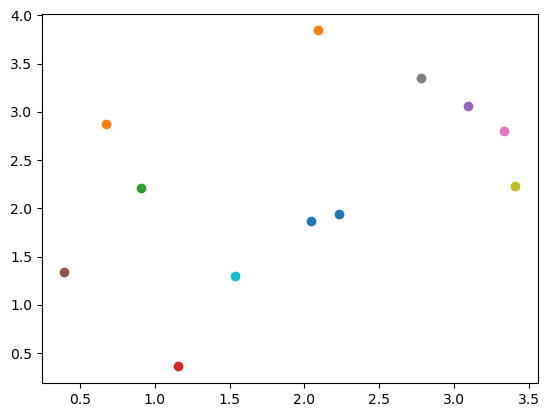

In [159]:
for i in range(nant):
    x,y = ant_pos[i]
    
    plt.plot(x,y,'o')

plt.show()

In [160]:
baselines=[]
for i in range(0,nant):
    for j in range(0,nant):
        if(i!=j):
            a1=ant_pos[i]
            a2=ant_pos[j]

            u=a1[0]-a2[0]
            v=a1[1]-a2[1]
            baselines.append([u,v])

In [161]:
uv=np.zeros(shape=(width,width),dtype=np.complex64)

center= max_baseline//2

for b in baselines:
    u,v=b
    u_index=int(width*(u/max_baseline)/2 + center)
    v_index=int(width*(v/max_baseline)/2 + center)
    uv[u_index,v_index]=1
    

In [162]:
sky=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(uv)))

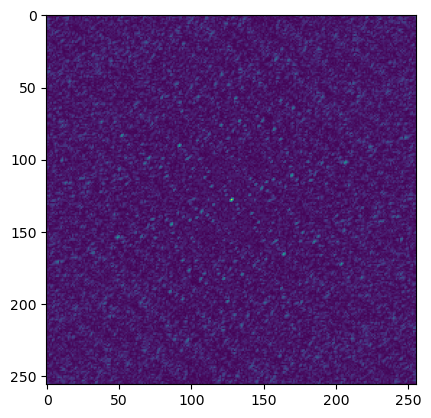

In [163]:
image = (np.abs(sky))
plt.imshow(image)
plt.show()